## L6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 5. Review: Empirical Mean and Covariance Matrix of a Vector Data Set I

In [2]:
# The Sample Covariance for a Data Set of Vectors
# empirical covariance matrix or sample covariance matrix
x1 = np.array([8,4,7])
x2 = np.array([2,8,1])
x3 = np.array([3,1,1])
x4 = np.array([9,7,4])

X = np.vstack([x1,x2,x3,x4])
X

array([[8, 4, 7],
       [2, 8, 1],
       [3, 1, 1],
       [9, 7, 4]])

In [3]:
bar_X = np.mean(X, axis=0)
bar_X, np.outer(bar_X, bar_X)

(array([5.5 , 5.  , 3.25]),
 array([[30.25  , 27.5   , 17.875 ],
        [27.5   , 25.    , 16.25  ],
        [17.875 , 16.25  , 10.5625]]))

In [4]:
S = (np.mean([np.outer(x1, x1),np.outer(x2, x2),np.outer(x3, x3),np.outer(x4, x4)],axis=0))-np.outer(bar_X, bar_X)
# np.cov is feature wise cov if we want sample wise, DATA.T
S_np=np.cov(X.T,bias=True)

print(f'sample covariance matrix= \n {S}, S == S_np? {(S==S_np).all()}')

sample covariance matrix= 
 [[9.25   1.     6.375 ]
 [1.     7.5    0.    ]
 [6.375  0.     6.1875]], S == S_np? True


In [5]:
def cov_matrix(X):
    n=X.shape[0]
    S = 1/n*(X.T@(np.identity(X.shape[0])-1/n*np.ones((n,n)))@X)
    return np.squeeze(S)

In [6]:
# other solution
n=X.shape[0]
S = cov_matrix(X)
print(f'sample covariance matrix= \n {S}, S == S_np? {(S==S_np).all()}')

sample covariance matrix= 
 [[9.25   1.     6.375 ]
 [1.     7.5    0.    ]
 [6.375  0.     6.1875]], S == S_np? True


### 6. Empirical Mean and Covariance Matrix of a Vector Data Set II

In [7]:
# H Orthogonal Projection Matrix
n=3
H = np.identity(n)-1/n*np.outer(np.ones(n),np.ones(n)) 
H

array([[ 0.66666667, -0.33333333, -0.33333333],
       [-0.33333333,  0.66666667, -0.33333333],
       [-0.33333333, -0.33333333,  0.66666667]])

- For any positive integer 𝑘 and any vector $𝐱 \in \mathbb{R}^n$, we have $𝐻^k 𝐱= 𝐻𝐱$.

In [8]:
x = np.random.random(n)
H@x, H@H@H@H@H@x

(array([ 0.11213535, -0.03832701, -0.07380834]),
 array([ 0.11213535, -0.03832701, -0.07380834]))

- The matrix $𝐻$  is a projection onto the subspace of vectors perpendicular to the vector $\vec{1} \in \mathbb{R}^n$ , which has all of its entries equal to  1 .

In [9]:
X = np.random.random((n,n))
_1vec = np.ones(n)
print('Is Hx dot 1-vector equal to 0(perpendicular to 1-vector)?', np.allclose(0,H@x@_1vec))
print('Is all feature in HX perpendicular to 1-vector?', np.allclose(0, np.sum(H@X@_1vec,axis=0)))

Is Hx dot 1-vector equal to 0(perpendicular to 1-vector)? True
Is all feature in HX perpendicular to 1-vector? True


- The matrix  𝐻 centering all columns(features) in a matrix
- The matrix  𝐻  is a projections onto the subspace  ${𝐱:\frac{1}{𝑛}\sum\limits_{i=1}^{n}{x^i}=0}\subset \mathbb{R}^n$ . (In other words, this is the set of vectors having coordinate-wise average equal to  0 .)

In [10]:
print('Is Hx centered?',np.allclose(0,np.sum(H@x)))      
print('Is all features in X centered?', np.allclose(0,np.sum(H@X, axis=0)))

Is Hx centered? True
Is all features in X centered? True


### 7. Measuring the Spread of a Point Cloud

In [11]:
# Projection onto a Line
u= 1/np.sqrt(5)*np.array([[1,2]]).T
x1=np.array([[1,2]]).T
x2=np.array([[3,4]]).T
x3=np.array([[-1,0]]).T
u.T@x1*u, u.T@x2*u, u.T@x3*u

(array([[1.],
        [2.]]),
 array([[2.2],
        [4.4]]),
 array([[-0.2],
        [-0.4]]))

In [12]:
# Empirical Variance of a Data Set in a Given Direction
X = np.vstack([u.T@x1, u.T@x2, u.T@x3])
S = cov_matrix(X)
S

array(4.8)

In [13]:
# 𝐮^T𝑆𝐮
u.T*S@u

array([[4.8]])

#### Variance of a Random Vector in a Given Direction
- Let $x \sim \mathcal{N}(0,\Sigma)$, $x \in \mathbb{R}^2$, $\Sigma \in \mathbb{R}^{2\times 2}$
$$\Sigma =E[XX^T]= \begin{bmatrix}E[(X^1)^2]&E[X^1 X^2]\\ E[X^1 X^2] & E[(X^2)^2]\end{bmatrix}=\begin{bmatrix}Var(X^1)&Var(X^1 X^2) \\ Var(X^1 X^2)&Var(X^2)\end{bmatrix}$$
- $Var(X^1 + X^2)=E[(X^1)^2] + E[(X^2)^2]+2*E[X^1 X^2]=\begin{bmatrix}1&1\end{bmatrix}\Sigma\begin{bmatrix}1\\1\end{bmatrix}$

#### A Preview of Principal Component Analysis
- Let $X_1,\dots,X_n \in \mathbb{R}^d$, $\mathbb{X} = \begin{bmatrix}-X_1^T- \\ \vdots \\ -X_n^T-\end{bmatrix}$
- ***Feature Centered*** empirical covariance matrix 
    - $S= \frac{1}{n} \mathbb{X}^T (I_n-\frac{1}{n} 1 1^T) \mathbb{X}$

### 8. The Decomposition Theorem for Symmetric Matrices

#### Orthogonal Matrices
- Marix $P \in \mathbb{R}^{d\times d}$ is orthogonal matrix/rotation matrix
    - if $PP^T=P^TP=I_d$
- Let $P=\begin{bmatrix}v_1&v_2&\dots&v_d \end{bmatrix}$
    - $v_i.T v_i = \sum_{l=1}^d v_{i,l}^2 = 1$
    - $v_i.T v_j = \sum_{l=1}^d v_{i,l}*v_{j,l} = 0$
- $det(P)=\pm1$

#### Eigenvectors and Eigenvalues of a Decomposition of a Symmetric Matrix
- $A \in \mathbb{R}^{d\times d}$
$$\begin{align}  A &= PDP^T \\
    &= \begin{bmatrix}v_1&v_2&\dots&v_d\end{bmatrix} \begin{bmatrix} \lambda_1&0&\dots&0 \\ 0&\lambda_2&\dots&0 \\ \vdots&\vdots&\ddots&\vdots \\ 0&0&\dots&\lambda_d\end{bmatrix}\begin{bmatrix}-v_1^T- \\ -v_2^T- \\ \vdots \\ -v_d^T-\end{bmatrix} \\
    &= \lambda_1 v_1\otimes v_1^T + \lambda_2 v_2 \otimes v_2^T + \dots + \lambda_d v_d \otimes v_d^T
    \end{align}$$
    
- $P \in \mathbb{R}^{d\times d} s.t. P \text{ is orthogonal}$
- $D \text{ is diagonal}$
    - $D = diag(\lambda_1, \lambda_2, \dots, \lambda_d)$
    - $\lambda \geq 0$
$$\begin{align}
    Av_1 &= (\lambda_1 v_1\otimes v_1^T + \lambda_2 v_2 \otimes v_2^T + \dots + \lambda_d v_d \otimes v_d^T) v_1\\
    &= \lambda_1 
    \begin{bmatrix}v_{1,1}^2     & v_{1,1}v_{1,2}& \dots &v_{1,1}v_{1,d}\\
                   v_{1,2}v_{1,1}& v_{1,2}^2     & \dots &v_{1,2}v_{1,d}\\
                    \vdots       &\vdots         &\vdots &\vdots \\
                   v_{1,d}v_{1,1}&v_{1,d}v_{1,2} & \dots &v_{1,d}^2\end{bmatrix} 
    \begin{bmatrix}v_{1,1}\\ v_{1,2}\\ \vdots \\ v_{1,d}\end{bmatrix} +
    \lambda_2 
    \begin{bmatrix}v_{2,1}^2     & v_{2,1}v_{2,2}& \dots &v_{2,1}v_{2,d}\\
                   v_{2,2}v_{2,1}& v_{2,2}^2     & \dots &v_{2,2}v_{2,d}\\
                    \vdots       &\vdots         &\vdots &\vdots \\
                   v_{2,d}v_{2,1}&v_{2,d}v_{2,2} & \dots &v_{2,d}^2\end{bmatrix} 
    \begin{bmatrix}v_{1,1}\\ v_{1,2}\\ \vdots \\ v_{1,d}\end{bmatrix}\\
    &= \lambda_1 
    \begin{bmatrix}v_{1,1}*(v_{1,1}^2+v_{1,2}^2+\dots +v_{1,d}^2) = v_{1,1}*\sum_{l=1} v_{1,l}^2 = v_{1,1}*1\\
                   v_{1,2}*(v_{1,1}^2+v_{1,2}^2+\dots +v_{1,d}^2) = v_{1,2}*\sum_{l=1} v_{1,l}^2 = v_{1,2}*1\\
                    \vdots\\
                   v_{1,d}*(v_{1,1}^2+v_{1,2}^2+\dots +v_{1,d}^2) = v_{1,d}*\sum_{l=1} v_{1,l}^2 = v_{1,d}*1\\\end{bmatrix} + 
   \lambda_2
   \begin{bmatrix}v_{2,1}*\sum_{l=1}^d v_{i,l}*v_{j,l} = 0\\
                  v_{2,2}*\sum_{l=1}^d v_{i,l}*v_{j,l} = 0\\
                    \vdots\\
                   v_{2,d}*\sum_{l=1}^d v_{i,l}*v_{j,l} = 0\\
                   \end{bmatrix}\\
    &= \lambda_1 v_1
   \end{align}$$

In [14]:
from scipy.stats import ortho_group
d = 20
P = ortho_group.rvs(dim=d)
lambdas = np.random.random(d)
D = np.diag(lambdas)
print(f'P is orthogonal? {np.allclose(P@P.T, P.T@P, np.eye(d))}')
# print('-----')
# print(f'P = \n {P}')
# print('-----')
# print(f'D = \n {D}')

P is orthogonal? True


In [15]:
A = P@D@P.T
# P is A's e-vectors matrix, D is A's e-values matrix
# first k e-vectors
k = 2
v_k = P[:,:k]
outer_sum=np.zeros(shape=v_k.shape)
for kk in range(k):
    outer_sum += (np.outer(P[:,kk],P[:,kk])*lambdas[kk])@v_k
# print(f'Av[:k] =\n{A@v_k}')
# print('-----')
# print(f'lambdas[:k] * v[:k] =\n {lambdas[:k]*v_k}')
# print('-----')
# print(f'( sum(lambda_kk*outer(v_kk, v_kk)) )@v_k = \n {outer_sum}')

print('Is A@v_k == lambdas[:k] * v[:k] == outer_sum ?\n', (np.allclose(A@v_k, lambdas[:k]*v_k)*np.allclose(A@v_k, outer_sum)))

Is A@v_k == lambdas[:k] * v[:k] == outer_sum ?
 1


In [16]:
# A is symmetric
print(f'Is A symmetric = \n {np.allclose(A,A.T)}')
print('-----')
# A is positive semidefinite
## all lambda(e-values) >=0 
print(f'all e-values >= 0 ? {(np.diag(D)>=0).all()}')
print('-----')
# A is positive definite
## all e-values = lambda >0 
print(f'all e-values > 0 ? {(np.diag(D>0)).all()}')

Is A symmetric = 
 True
-----
all e-values >= 0 ? True
-----
all e-values > 0 ? True


#### Concept Check: The Decomposition Theorem for Symmetric Matrices
- P
    - The columns of  𝑃  are unit vectors.
    - The columns of  𝑃  are eigenvectors of  𝐴 .
    - The dot product of any two different columns of  𝑃  is  0 .
    - The rows of  𝑃  are unit vectors.
- D
    - The diagonal entries of  𝐷  are the eigenvalues of  𝐴 .
    - The first diagonal element of  𝐷  (i.e. in the top left corner) is the eigenvalue corresponding to the eigenvector which is in the first (i.e. leftmost) column of  𝑃 .
    - It is possible for any of the diagonal entries of  𝐷  to be zero.
    - It is possible for all of the diagonal entries of  𝐷  to be the same

#### Concept Check: Properties of Covariance Matrices
- Let  Σ  denote a covariance matrix for some random vector  𝑋∈ℝ𝑑 . (Assume that  $E[||X||_2^2]<\infty$ .)
- Σ definitely
    - Symmetric
    - Positive Semidefinite

### 9. Principal Component Analysis (PCA)

#### Centering Data
- Why using centered data? for LESS computational cost, the result is the same
    1. Let dataset $\mathbb{X} \in \mathbb{R}^{n \times d}$, feature vector $X_{1 \leq i \leq d} \in \mathbb{R}^n$
        - $\mathbb{X} = \begin{bmatrix} X_1 & X_2 & \dots & X_d \end{bmatrix}$
    2. Covariance(between each feature) matrix of X:
        - $S = \begin{bmatrix} Cov(X_1, X_1) & Cov(X_1, X_2) & \dots & Cov(X_1, X_d) \\
                               Cov(X_2, X_1) & Cov(X_2, X_2) & \dots & Cov(X_2, X_d) \\
                               \vdots        & \vdots        & \ddots& \vdots        \\
                               Cov(X_d, X_1) & Cov(X_d, X_2) & \dots & Cov(X_d, X_d)
               \end{bmatrix}
             = \begin{bmatrix} E[X_1^T X_1]-E[X_1]E[X_1] & E[X_1^T X_2]-E[X_1]E[X_2] & \dots & E[X_1^T X_d]-E[X_1]E[X_d] \\
                               E[X_2^T X_1]-E[X_2]E[X_1] & E[X_2^T X_2]-E[X_2]E[X_2] & \dots & E[X_2^T X_d]-E[X_2]E[X_d] \\
                               \vdots                    & \vdots                    & \ddots& \vdots                    \\
                               E[X_d^T X_1]-E[X_d]E[X_1] & E[X_d^T X_2]-E[X_d]E[X_2] & \dots & E[X_d^T X_d]-E[X_d]E[X_d] \\
               \end{bmatrix}$
    3. If data is centered, $0 = E[X_1] = E[X_2] = \dots = E[X_d]$
        - $S = \begin{bmatrix} E[X_1^T X_1] & E[X_1^T X_2] & \dots & E[X_1^T X_d] \\
                               E[X_2^T X_1] & E[X_2^T X_2] & \dots & E[X_2^T X_d] \\
                               \vdots       & \vdots       & \ddots& \vdots       \\
                               E[X_d^T X_1] & E[X_d^T X_2] & \dots & E[X_d^T X_d] \\
               \end{bmatrix}$

In [17]:
n=3
x = np.random.random(n)
H = np.identity(n)-1/n*np.outer(np.ones(n),np.ones(n)) 
print(f'original vector =\n {x}')
print('-----')
print(f'expectation of x =\n {np.mean(x)}')
print('-----')
print(f'centered data =\n {x-np.mean(x)}')
print('-----')
print('compare with using H, has same result? ', np.allclose(H@x, x-np.mean(x, axis=0)))

original vector =
 [0.03123444 0.54400361 0.44931098]
-----
expectation of x =
 0.3415163418226597
-----
centered data =
 [-0.3102819   0.20248727  0.10779463]
-----
compare with using H, has same result?  True


In [18]:
X = np.random.random((n,n+1))
print(f'original dataset =\n {X}')
print('-----')
print(f'expectation of each feature = {np.mean(X, axis=0)}')
print('-----')
print(f'feature centered data set =\n {X-np.mean(X, axis=0)}')
print('-----')
print('compare with using H, has same result? ', np.allclose(H@X, X-np.mean(X, axis=0)))

original dataset =
 [[0.15430676 0.86491224 0.03367474 0.8072289 ]
 [0.5207967  0.65733124 0.69992944 0.42691473]
 [0.85930624 0.3002285  0.61577759 0.95626665]]
-----
expectation of each feature = [0.5114699  0.60749066 0.44979393 0.73013676]
-----
feature centered data set =
 [[-0.35716314  0.25742158 -0.41611918  0.07709214]
 [ 0.0093268   0.04984058  0.25013551 -0.30322203]
 [ 0.34783634 -0.30726217  0.16598367  0.22612989]]
-----
compare with using H, has same result?  True


In [19]:
# sns.scatterplot(x=X[:,0], y=X[:,1])
# sns.scatterplot(x=H@X[:,0], y=H@X[:,1])
# plt.show()

#### Conceptual Example I: 2 data points in 2D

In [20]:
X = np.array([[0,1],[0,-1]])
S = cov_matrix(X)
S

array([[0., 0.],
       [0., 1.]])

In [21]:
np.linalg.eig(S), np.linalg.eig(X)

((array([0., 1.]),
  array([[1., 0.],
         [0., 1.]])),
 (array([ 0., -1.]),
  array([[ 1.        , -0.70710678],
         [ 0.        ,  0.70710678]])))

#### 10. Conceptual Examples in 2 dimensions

In [22]:
𝐱_1 	 = 	 np.array((1,1/2))
𝐱_2 	 = 	 np.array((-1,-1/2))
X=np.vstack([x_1,x_2])
print(f'Original ds = \n{X}')
print('-----')
# covariance matrix
XS =np.cov(X.T,bias=True)
print(f'covariance matrix XS = \n{XS}')
print('-----')
print(f'double check S, {np.allclose(XS, cov_matrix(X))}')
print('-----')
e_values, e_vectors = np.linalg.eig(XS)
e_values_matrix = np.diag(e_values)
print(f'e_values_matrix = \n {e_values_matrix}')
print('-----')
print(f'e_vectors_matrix = \n {e_vectors}')
print('-----')
PC1_value_ind = np.argmax(e_values)
PC1_value = e_values[PC1_value_ind]
PC1_vector = e_vectors[:,PC1_value_ind]
print(f'PC1 e-value, e-vector = \n{PC1_value}, {PC1_vector}')
print('-----')
x1_on_PC1 = PC1_vector@x_1
x2_on_PC1 = PC1_vector@x_2
print(f'x_1 projected on PC1 = \n {x1_on_PC1}')
print(f'x_2 projected on PC1 = \n {x2_on_PC1}')
print('-----')
Y = np.vstack([x1_on_PC1, x2_on_PC1])
print(f'Projected ds = \n {Y}')
print('-----')
YS = cov_matrix(Y)
print(f'Projected covariance matrix YS = \n {YS}')
print('-----')
# np.array(np.dot(e_vectors[:,1],x_1))

Original ds = 
[[ 1.   0.5]
 [-1.  -0.5]]
-----
covariance matrix XS = 
[[1.   0.5 ]
 [0.5  0.25]]
-----
double check S, True
-----
e_values_matrix = 
 [[1.25 0.  ]
 [0.   0.  ]]
-----
e_vectors_matrix = 
 [[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]
-----
PC1 e-value, e-vector = 
1.25, [0.89442719 0.4472136 ]
-----
x_1 projected on PC1 = 
 1.118033988749895
x_2 projected on PC1 = 
 -1.118033988749895
-----
Projected ds = 
 [[ 1.11803399]
 [-1.11803399]]
-----
Projected covariance matrix YS = 
 1.2500000000000002
-----


#### 11. Conceptual Examples in 2 dimensions

In [23]:
𝐱_1 	 = 	 np.array((0,2))
𝐱_2 	 = 	 np.array((1,-1))
𝐱_3 	 = 	 np.array((-1,-1))
X=np.vstack([x_1,x_2,x_3])

print(f'Original ds = \n{X}')
print('-----')
# covariance matrix
XS =np.cov(X.T,bias=True)
print(f'covariance matrix XS = \n{XS}')
print('-----')
print(f'double check S, {np.allclose(XS, cov_matrix(X))}')
print('-----')
e_values, e_vectors = np.linalg.eig(XS)
e_values_matrix = np.diag(e_values)
print(f'e_values_matrix = \n {e_values_matrix}')
print('-----')
print(f'e_vectors_matrix = \n {e_vectors}')
print('-----')
PC1_value_ind = np.argmax(e_values)
PC1_value = e_values[PC1_value_ind]
PC1_vector = e_vectors[:,PC1_value_ind]
print(f'PC1 e-value, e-vector = \n{PC1_value}, {PC1_vector}')
print('-----')
x1_on_PC1 = PC1_vector@x_1
x2_on_PC1 = PC1_vector@x_2
x3_on_PC1 = PC1_vector@x_3
print(f'x_1 projected on PC1 = \n {x1_on_PC1}')
print(f'x_2 projected on PC1 = \n {x2_on_PC1}')
print(f'x_3 projected on PC1 = \n {x3_on_PC1}')
print('-----')
Y = np.vstack([x1_on_PC1, x2_on_PC1, x3_on_PC1])
print(f'Projected ds = \n {Y}')
print('-----')
YS = cov_matrix(Y)
print(f'Projected covariance matrix YS = \n {YS}')

Original ds = 
[[ 0  2]
 [ 1 -1]
 [-1 -1]]
-----
covariance matrix XS = 
[[0.66666667 0.        ]
 [0.         2.        ]]
-----
double check S, True
-----
e_values_matrix = 
 [[0.66666667 0.        ]
 [0.         2.        ]]
-----
e_vectors_matrix = 
 [[1. 0.]
 [0. 1.]]
-----
PC1 e-value, e-vector = 
2.0, [0. 1.]
-----
x_1 projected on PC1 = 
 2.0
x_2 projected on PC1 = 
 -1.0
x_3 projected on PC1 = 
 -1.0
-----
Projected ds = 
 [[ 2.]
 [-1.]
 [-1.]]
-----
Projected covariance matrix YS = 
 2.0


#### 12. Conceptual Examples Continued

In [24]:
𝐱_1 	 = 	 np.array((0,2))
𝐱_2 	 = 	 np.array((0,-2))
𝐱_3 	 = 	 np.array((1,1))
𝐱_4 	 = 	 np.array((-1,-1))
X=np.vstack([x_1,x_2,x_3,x_4])
print(f'Original ds = \n{X}')
print('-----')
# covariance matrix
XS =np.cov(X.T,bias=True)
print(f'covariance matrix XS = \n{XS}')
print('-----')
print(f'double check S, {np.allclose(XS, cov_matrix(X))}')
print('-----')
e_values, e_vectors = np.linalg.eig(XS)
e_values_matrix = np.diag(e_values)
print(f'e_values_matrix = \n {e_values_matrix}')
print('-----')
print(f'e_vectors_matrix = \n {e_vectors}')
print('-----')
PC1_value_ind = np.argmax(e_values)
PC1_value = e_values[PC1_value_ind]
PC1_vector = e_vectors[:,PC1_value_ind]
print(f'PC1 e-value, e-vector = \n{PC1_value}, {PC1_vector}')
print('-----')
x1_on_PC1 = PC1_vector@x_1
x2_on_PC1 = PC1_vector@x_2
x3_on_PC1 = PC1_vector@x_3
x4_on_PC1 = PC1_vector@x_4
# print(f'x_1 projected on PC1 = \n {x1_on_PC1}')
# print(f'x_2 projected on PC1 = \n {x2_on_PC1}')
# print(f'x_2 projected on PC1 = \n {x3_on_PC1}')
# print(f'x_2 projected on PC1 = \n {x4_on_PC1}')
# print('-----')
Y = np.vstack([x1_on_PC1, x2_on_PC1, x3_on_PC1, x4_on_PC1])
print(f'Projected ds = \n {Y}')
print('-----')
YS = cov_matrix(Y)
print(f'Projected covariance matrix YS = \n {YS}')

Original ds = 
[[ 0  2]
 [ 0 -2]
 [ 1  1]
 [-1 -1]]
-----
covariance matrix XS = 
[[0.5 0.5]
 [0.5 2.5]]
-----
double check S, True
-----
e_values_matrix = 
 [[0.38196601 0.        ]
 [0.         2.61803399]]
-----
e_vectors_matrix = 
 [[-0.97324899 -0.22975292]
 [ 0.22975292 -0.97324899]]
-----
PC1 e-value, e-vector = 
2.618033988749895, [-0.22975292 -0.97324899]
-----
Projected ds = 
 [[-1.94649798]
 [ 1.94649798]
 [-1.20300191]
 [ 1.20300191]]
-----
Projected covariance matrix YS = 
 2.6180339887498945


### 13. Covariance versus Correlation

- 用 Correlation 來做能夠避免 data 被 rescal 後的 相關性被改變，ex: cm/age vs inch/age, 點之間的距離並不一定相同
- IF each covariate  $X_i$  represents a particular physical characteristics, such as age, height, weight, blood pressure, etc of individuals.
    - use the correlation matrix instead of the covariance matrix for PCA
- ***random variables***
    - Recall that the correlation  $\rho_{X,Y}$ of two random variables  $X$  and  $Y$  is the covariance of the the rescaled random variables  $\frac{X}{\sigma_{X}}$ , and  $\frac{Y}{\sigma_{Y}}$
        - $\rho_{X,Y} = Cov(\frac{X}{\sigma_{X}}, \frac{Y}{\sigma_{Y}}) = \frac{Cov(X,Y)}{\sigma_{X}\sigma_{Y}} = \frac{E[XY]-E[X]E[Y]}{\sqrt{(E[X^2] - E[X]^2)(E[Y^2] - E[Y]^2)}}$
        - if $E[X] = E[Y] = 0$, then
            - $\rho_{X,Y} = \frac{E[XY]}{\sqrt{(E[X^2])(E[Y^2])}}$
- ***random vectors***
    - Extending to random vectors $X$  with  $E[X]=0$ , the correlation matrix is the covariance matrix of rescaled data:
$$E[\tilde{X}\tilde{X}^T]=E[\begin{bmatrix} \frac{X_1}{\sigma_{X_1}} \\ \frac{X_2}{\sigma_{X_2}} \\ \vdots \\ \frac{X_n}{\sigma_{X_n}} \end{bmatrix} \begin{bmatrix} \frac{X_1}{\sigma_{X_1}} & \frac{X_2}{\sigma_{X_2}} & \dots & \frac{X_n}{\sigma_{X_n}} \end{bmatrix}] $$
	 
    - so that  𝑖,𝑗 -th entry of the correlation matrix is  $E[\frac{X_i X_j}{\sigma_{X_i}\sigma_{X_j}}]$

    - By definition, covariance has the dimension of squared of the data, while correlation is dimensionless. Hence, when covariates have different dimensions or units, it makes more sense to first rescale each covariate by its sample standard deviation, before determining the directions of largest spread using PCA.

In [25]:
def cov_matrix(X):
    n=X.shape[0]
    S = 1/n*(X.T@(np.identity(X.shape[0])-1/n*np.ones((n,n)))@X)
    return np.squeeze(S)
def corr_matrix(X):
    cov = cov_matrix(X)
    std = np.outer(np.std(X, axis=0), np.std(X, axis=0))
    return cov/std

In [26]:
np.allclose(corr_matrix(X), np.corrcoef(X.T))

True

In [27]:
# difference between centered or not centered data set, in cov and corr
n, d = 20, 3
X = np.random.random((n,d))
H = np.identity(n)-1/n*np.outer(np.ones(n),np.ones(n)) 

In [28]:
# for scalar in range(1,3):
#     X_temp = X.copy()
#     X_temp = scalar*X_temp
#     corr = corr_matrix(X_temp)
#     cov  = cov_matrix(X_temp)
#     print(f'scalar = {scalar}')
#     print('scaled dataset corr =\n', corr)
#     print('-----')
#     print('scaled dataset cov =\n', cov)
#     print('-----')
#     X_temp[:,0] = scalar*X_temp[:,0]-8
#     corr = corr_matrix(X_temp)
#     cov  = cov_matrix(X_temp)
#     print('scaled feature corr =\n', corr)
#     print('-----')
#     print('scaled feature cov =\n', cov)
#     print('-----')
    
print('scaled feature in dataset or scaled dataset wont change Correlation matrix')
print('scaled feature in dataset or scaled dataset will change Covariance matrix, scaled = scalar^2 * original')
print('add any constant to feature in dataset or data set wont change any result')

scaled feature in dataset or scaled dataset wont change Correlation matrix
scaled feature in dataset or scaled dataset will change Covariance matrix, scaled = scalar^2 * original
add any constant to feature in dataset or data set wont change any result


#### Visualize results

In [29]:
n, d = 40, 5
X = np.random.random((n,d))
# wnat x in R^5 -> y in R^2

In [30]:
# cov version
cov_X = cov_matrix(X)
e_values, e_vectors = np.linalg.eig(cov_X)
sorted_indices = np.argsort(e_values)[::-1]
e_values_matrix_cov = np.diag(np.take_along_axis(e_values, np.argsort(e_values)[::-1], axis=0))
e_vectors_cov = e_vectors[:,sorted_indices]
Y_cov = X@e_vectors_cov[:,:2]
Y_cov.shape

(40, 2)

In [31]:
# corr version
corr_X = corr_matrix(X)
e_values, e_vectors = np.linalg.eig(corr_X)
sorted_indices = np.argsort(e_values)[::-1]
e_values_matrix_corr = np.diag(np.take_along_axis(e_values, np.argsort(e_values)[::-1], axis=0))
e_vectors_corr = e_vectors[:,sorted_indices]
Y_corr = X@e_vectors_corr[:,:2]
Y_corr.shape

(40, 2)

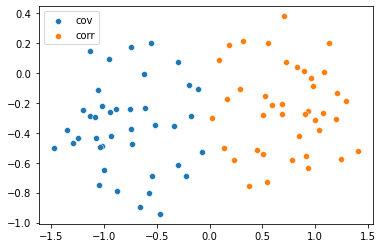

In [32]:
sns.scatterplot(x=Y_cov[:,0], y=Y_cov[:,1], label='cov')
sns.scatterplot(x=Y_corr[:,0], y=Y_corr[:,1], label='corr')
plt.legend()
plt.show()

### 14. Total Variance
- We can decide how many principal components to retain in the projection of the data based on their explained variance.
- The total variance is the sum of variance of all the principal components, which equals the sum of the eigenvalues of the covariance matrix:
    - Total Variance:$\sum\limits_{j=1}^{p}\lambda_j$

- The fraction of variance explained by a principal component is the ratio of the variance of that principal component to the total variance:
    - $\frac{\lambda_j}{\sum\limits_{j=1}^{p}\lambda_j}$
    
Ungraded Exercise: Compare the explained variance of the first principal component when PCA is applied to the correlation matrix with when PCA is applied to the covariance matrix.

In [33]:
n, d = 40, 20
X = np.random.randint(20, size=(n,d))

cov  = cov_matrix(X)
e_values_cov, e_vetors_cov = np.linalg.eig(cov)
sorted_indices = np.argsort(e_values_cov)[::-1]
e_values_cov = e_values_cov[sorted_indices]
e_vetors_cov = e_vetors_cov[:,sorted_indices]
# print('cov =\n', cov)
print('e_values_cov =\n', e_values_cov)
# print('e_vetors_cov =\n', e_vetors_cov)
print('-----')

corr = corr_matrix(X)
e_values_corr, e_vetors_corr = np.linalg.eig(corr)
sorted_indices = np.argsort(e_values_corr)[::-1]
e_values_corr = e_values_corr[sorted_indices]
e_vetors_corr = e_vetors_corr[:,sorted_indices]
# print('corr =\n', corr)
print('e_values_corr =\n', e_values_corr)
# print('e_vetors_corr =\n', e_vetors_corr)

e_values_cov =
 [92.96583171 69.74150583 65.19818689 54.22897394 49.11649813 42.76532033
 40.01045301 38.6180372  31.58203834 29.57128277 27.56687888 23.52238744
 20.63142154 17.72814188 16.16701826 13.21853763  9.33039559  7.61572927
  6.12413831  5.10784803]
-----
e_values_corr =
 [2.66685142 2.152507   1.86366106 1.63100182 1.52045339 1.29546385
 1.2351152  1.17106642 0.96892218 0.94794266 0.82080173 0.77087402
 0.66659711 0.53701483 0.49051541 0.39912747 0.29162359 0.24319229
 0.18026559 0.14700295]


In [34]:
print('Fraction of variance in each principal component(e-value/sum(e-values)):')
print('Covariance base PCA fraction =\n', e_values_cov / np.sum(e_values_cov))
print('Covariance base PCA Summation =\n',np.sum(e_values_cov))
print('-----')
print('Correlation base PCA fraction =\n', e_values_corr / np.sum(e_values_corr))
print('Correlation base PCA Summation =\n', np.sum(e_values_corr))

Fraction of variance in each principal component(e-value/sum(e-values)):
Covariance base PCA fraction =
 [0.14068453 0.10553932 0.09866395 0.08206432 0.07432765 0.06471645
 0.06054753 0.0584404  0.04779287 0.04475001 0.04171676 0.03559626
 0.03122138 0.02682787 0.02446543 0.02000352 0.01411962 0.01152483
 0.00926761 0.00772967]
Covariance base PCA Summation =
 660.8106250000002
-----
Correlation base PCA fraction =
 [0.13334257 0.10762535 0.09318305 0.08155009 0.07602267 0.06477319
 0.06175576 0.05855332 0.04844611 0.04739713 0.04104009 0.0385437
 0.03332986 0.02685074 0.02452577 0.01995637 0.01458118 0.01215961
 0.00901328 0.00735015]
Correlation base PCA Summation =
 20.000000000000014


In [35]:
print('The difference between two PCA is about 10%')
(e_values_cov / np.sum(e_values_cov)- (e_values_corr / np.sum(e_values_corr))) / ((e_values_cov / np.sum(e_values_cov)))

The difference between two PCA is about 10%


array([ 0.05218739, -0.01976541,  0.05555117,  0.00626616, -0.02280476,
       -0.00087673, -0.01995502, -0.00193224, -0.01366806, -0.05915355,
        0.01622068, -0.08280196, -0.06753296, -0.00085251, -0.00246622,
        0.00235684, -0.03268916, -0.05507985,  0.02744347,  0.04909941])

### 15. Multidimensional Scaling (MDS)

In [36]:
# given dataset X_origin
n, d = 5,5
X_origin = np.random.randint(10, size=(n,d))
X_origin.shape

(5, 5)

In [37]:
# 1. compute distance matrix
from sklearn.metrics import pairwise_distances
X_distance_matrix = pairwise_distances(X_origin)
# print('distance matrix=\n',X_distance_matrix)
# print('-----')

# 2. convert distance matrix into inner product representation
H = np.identity(n)-1/n*np.outer(np.ones(n),np.ones(n)) 
XXT= (-1/2) * H@X_distance_matrix**2@H
# print('inner product representation=\n',XXT)

In [38]:
# 3. conpute e-vectors, e-values
e_values, e_vectors = np.linalg.eig(XXT)
e_values[np.isclose(0,e_values)] = 0
sorted_indices = np.argsort(e_values)[::-1]

e_values_matrix_MDS = np.diag(e_values[sorted_indices])
e_vectors_MDS = e_vectors[:,sorted_indices]
print('e_values =\n', e_values[sorted_indices])
# print('e_vectors_MDS =\n', e_vectors_MDS)
print('-----')
# 4. output Y, k components
k=2
Y_MDS = e_vectors_MDS[:,:k]@np.sqrt(e_values_matrix_MDS[:k,:k])
# print('Y_MDS =\n',Y_MDS)

e_values =
 [124.73958107  49.64400573  25.86994004   0.94647316   0.        ]
-----


#### check properties

In [39]:
X_inner = (e_vectors_MDS@np.sqrt(e_values_matrix_MDS))
print('Is X = e-vectors @ e-values^0.5?', np.allclose(X_inner@X_inner.T, XXT))

Is X = e-vectors @ e-values^0.5? True


In [40]:
for nn in range(1,n+1):
    # determine Y by e-vec, e-val of XX.T
    Y_MDS_eig = e_vectors_MDS[:,:nn]@np.sqrt(e_values_matrix_MDS[:nn,:nn])
    # determine Y by X @ filter_matrix
    filter_matrix = np.identity(n)[:,:nn]
    Y_MDS_fil = X_inner@filter_matrix
    print(f'first-{nn} compoments')
    print('Is Y_MDSs same?\n', np.allclose(Y_MDS_eig, Y_MDS_fil))
    print('trace(X@X.T-Y@Y.T)^2 =\n',(np.trace(X_inner@X_inner.T - Y_MDS_eig@Y_MDS_eig.T)**2))
    print('-----')

first-1 compoments
Is Y_MDSs same?
 True
trace(X@X.T-Y@Y.T)^2 =
 5846.195662501396
-----
first-2 compoments
Is Y_MDSs same?
 True
trace(X@X.T-Y@Y.T)^2 =
 719.120016820741
-----
first-3 compoments
Is Y_MDSs same?
 True
trace(X@X.T-Y@Y.T)^2 =
 0.8958114455916345
-----
first-4 compoments
Is Y_MDSs same?
 True
trace(X@X.T-Y@Y.T)^2 =
 0.0
-----
first-5 compoments
Is Y_MDSs same?
 True
trace(X@X.T-Y@Y.T)^2 =
 0.0
-----


### 16. Stochastic Neighbor Embedding (SNE) and t-distributed Stochastic Neighbor Embedding (t-SNE)

In [41]:
X = np.array([[-1,1],[2,3],[0,0]])
X_distance_matrix = pairwise_distances(X)
X_distance_matrix

array([[0.        , 3.60555128, 1.41421356],
       [3.60555128, 0.        , 3.60555128],
       [1.41421356, 3.60555128, 0.        ]])

### 17. KL-divergence

In [197]:
d12, d13 = 1 ,1
d23 = np.sqrt(2)

In [234]:
def p_finder(traget, ds):
    ds = np.array(ds)
    p_traget = np.exp(-traget**2) / np.sum(np.exp(-(ds**2)))
    return p_traget

In [235]:
p12 = p_finder(d12, [d12,d13,d23])
p13 = p_finder(d13, [d12,d13,d23])
p23 = p_finder(d23, [d12,d13,d23])
p12,p13,p23

(0.42231879825151825, 0.42231879825151825, 0.15536240349696354)

In [236]:
def p_finder2(traget, ds):
    ds = np.array(ds)
    p_traget = (1/(1+traget**2)) / np.sum(1/(1+ds**2))
    return p_traget

In [240]:
c=0
for _d12 in np.arange(1.157,1.159, 0.0001):
    _d13 = _d12
    _d23 = _d12*2
    q12 = p_finder2(_d12, [_d12,_d13,_d23])
    q23 = p_finder2(_d23, [_d12,_d13,_d23])
    print(_d12)
    print(2*p12*np.log(p12/q12) + p23*np.log(p23/q23))

1.157
1.0242343445917418e-08
1.1571
7.96360893501075e-09
1.1572
5.971528694106738e-09
1.1573
4.265957624225347e-09
1.1574
2.846750887211709e-09
1.1575
1.7137632936328371e-09
1.1576
8.668499666735836e-10
1.1577
3.058660188343267e-10
1.1578
3.066673947677126e-11
1.1579
4.1107466567066636e-11
1.158
3.3704308333156005e-10
1.1581
9.183295801076243e-10
1.1582
1.7848218953744129e-09
1.1582999999999999
2.9363760230158254e-09
1.1583999999999999
4.372847067844569e-09
1.1584999999999999
6.0940910866198e-09
1.1585999999999999
8.099963162968237e-09
1.1586999999999998
1.039031992968565e-08
1.1587999999999998
1.296501653334347e-08
1.1588999999999998
1.5823909082268218e-08
1.1589999999999998
1.8966853570823216e-08


In [182]:
q12 = p_finder(_d12, [_d12,_d13,_d23])
q23 = p_finder(_d23, [_d12,_d13,_d23])

In [183]:
q12, q23

(0.40679038757564956, 0.18641922484870083)

In [184]:
2*p12*np.log(p12/q12)

0.03164218561047372

In [185]:
p23*np.log(p23/q23)

-0.02831286526837094

In [186]:
print(2*p12*np.log(p12/q12) + p23*np.log(p23/q23))

0.003329320342102784


In [190]:
np.arange(0.48,0.6, 0.001)

array([0.48 , 0.481, 0.482, 0.483, 0.484, 0.485, 0.486, 0.487, 0.488,
       0.489, 0.49 , 0.491, 0.492, 0.493, 0.494, 0.495, 0.496, 0.497,
       0.498, 0.499, 0.5  , 0.501, 0.502, 0.503, 0.504, 0.505, 0.506,
       0.507, 0.508, 0.509, 0.51 , 0.511, 0.512, 0.513, 0.514, 0.515,
       0.516, 0.517, 0.518, 0.519, 0.52 , 0.521, 0.522, 0.523, 0.524,
       0.525, 0.526, 0.527, 0.528, 0.529, 0.53 , 0.531, 0.532, 0.533,
       0.534, 0.535, 0.536, 0.537, 0.538, 0.539, 0.54 , 0.541, 0.542,
       0.543, 0.544, 0.545, 0.546, 0.547, 0.548, 0.549, 0.55 , 0.551,
       0.552, 0.553, 0.554, 0.555, 0.556, 0.557, 0.558, 0.559, 0.56 ,
       0.561, 0.562, 0.563, 0.564, 0.565, 0.566, 0.567, 0.568, 0.569,
       0.57 , 0.571, 0.572, 0.573, 0.574, 0.575, 0.576, 0.577, 0.578,
       0.579, 0.58 , 0.581, 0.582, 0.583, 0.584, 0.585, 0.586, 0.587,
       0.588, 0.589, 0.59 , 0.591, 0.592, 0.593, 0.594, 0.595, 0.596,
       0.597, 0.598, 0.599])

In [241]:
0.05*0.99 + 0.95*0.1

0.14450000000000002

In [242]:
0.05*0.99 / (0.05*0.99 + 0.95*0.1)

0.34256055363321797